In [52]:
import numpy as np
import pandas as pd

### Problem 1: Parameter Estimation

In [53]:
heads = []

flips = np.random.binomial(10, .5)
for h in range(0, flips):
    heads.append(1)

heads = heads + [0]*(10 - flips)

print(heads)

[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


### Problem 2: Stationarity

In [54]:
heads = []

p = .5 + np.random.normal(0, .1)
flips = np.random.binomial(10, p)
for h in range(0, flips):
    heads.append(1)

heads = heads + [0]*(10 - flips)

print(heads)
print('Estimated Parameter:', np.mean(heads))
print('Parameter:', p)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Estimated Parameter: 0.5
Parameter: 0.4668920711598127


### Problem 3: "Edge"

Consider trading strategy $S$, we can define the expected P/L as follows...

$$\mathbb{E}[S] = \mathbb{E}[S | W = 1]P(W = 1) + \mathbb{E}[S | W = 0]P(W = 0)$$

Where clearly the expectations and probabilities have to be estimated from data...

In [55]:
trading_results = pd.DataFrame(columns=['P/L', 'Win', 'Loss'])
pl = [150, 120, 90, 100, -300, -100, -50]
wins = [1, 1, 1, 1, 0, 0, 0]
losses = [0, 0, 0, 0, 1, 1, 1]

trading_results['P/L'] = pl
trading_results['Win'] = wins
trading_results['Loss'] = losses

trading_results

,P/L,Win,Loss
0,150,1,0
1,120,1,0
2,90,1,0
3,100,1,0
4,-300,0,1
5,-100,0,1
6,-50,0,1


In [56]:
print("Expected P/L:", float(np.mean(trading_results['P/L'])))
print("Expected Win P/L:", float(np.mean(trading_results[trading_results['Win'] > 0]['P/L'])))
print("Expected Loss P/L:", float(np.mean(trading_results[trading_results['Loss'] > 0]['P/L'])))
print("Probability of Win: ", float(np.mean(trading_results['Win'])))
print("Probability of Loss: ", float(np.mean(trading_results['Loss'])))

Expected P/L: 1.4285714285714286
Expected Win P/L: 115.0
Expected Loss P/L: -150.0
Probability of Win:  0.5714285714285714
Probability of Loss:  0.42857142857142855


### Equity Curve of Strategy $S$

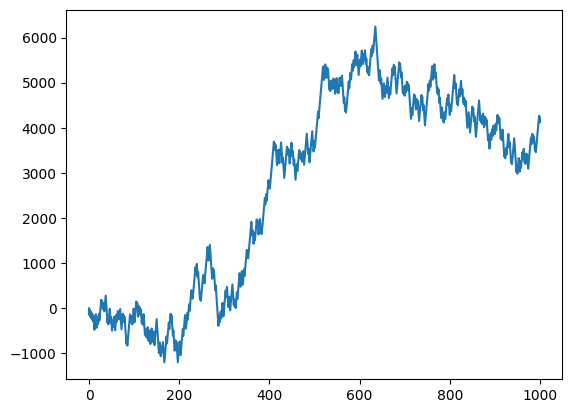

In [57]:
import matplotlib.pyplot as plt

pl = [0]
for i in range(1000):
    pl.append(115 if np.random.binomial(1, .6) > 0 else -150)

plt.plot(np.cumsum(pl))

$\mathbb{E}[S] = \mathbb{E}[S | W = 1]P(W = 1) + \mathbb{E}[S | W = 0]P(W = 0)$

In [58]:
import ipywidgets as widgets
from IPython.display import display

In [59]:
# Calculate initial values
expected_pl = float(np.mean(trading_results['P/L']))
expected_win_pl = float(np.mean(trading_results[trading_results['Win'] > 0]['P/L']))
expected_loss_pl = float(np.mean(trading_results[trading_results['Loss'] > 0]['P/L']))
probability_win = float(np.mean(trading_results['Win']))
probability_loss = float(np.mean(trading_results['Loss']))

# Create sliders
win_prob_slider = widgets.FloatSlider(
    value=probability_win, min=0, max=1, step=0.01, description='Win Probability:', continuous_update=False
)
win_exp_slider = widgets.FloatSlider(
    value=expected_win_pl, min=-200, max=200, step=1, description='Win Expectation:', continuous_update=False
)
loss_exp_slider = widgets.FloatSlider(
    value=expected_loss_pl, min=-200, max=200, step=1, description='Loss Expectation:', continuous_update=False
)

def update_expectation(win_prob, win_exp, loss_exp):
    loss_prob = 1 - win_prob  # Loss probability is complementary to win probability
    expected_pl = win_prob * win_exp + loss_prob * loss_exp  # Law of Total Expectation
    clear_output(wait=True)
    display(win_prob_slider, win_exp_slider, loss_exp_slider)
    print("\n--- Updated Results ---")
    print(f"Expected P/L: {expected_pl:.2f}")
    print(f"Probability of Win: {win_prob:.2f}")
    print(f"Probability of Loss: {loss_prob:.2f}")
    print(f"Expected Win P/L: {win_exp:.2f}")
    print(f"Expected Loss P/L: {loss_exp:.2f}")

# Link sliders to function
widgets.interactive(
    update_expectation,
    win_prob=win_prob_slider,
    win_exp=win_exp_slider,
    loss_exp=loss_exp_slider
)

# Display sliders
display(win_prob_slider, win_exp_slider, loss_exp_slider)


FloatSlider(value=0.5714285714285714, continuous_update=False, description='Win Probability:', max=1.0, step=0…

FloatSlider(value=115.0, continuous_update=False, description='Win Expectation:', max=200.0, min=-200.0, step=…

FloatSlider(value=-150.0, continuous_update=False, description='Loss Expectation:', max=200.0, min=-200.0, ste…

In [68]:
win_prob_slider.value * win_exp_slider.value + (1 - win_prob_slider.value) * loss_exp_slider.value

-22.78

### New Equity Curve

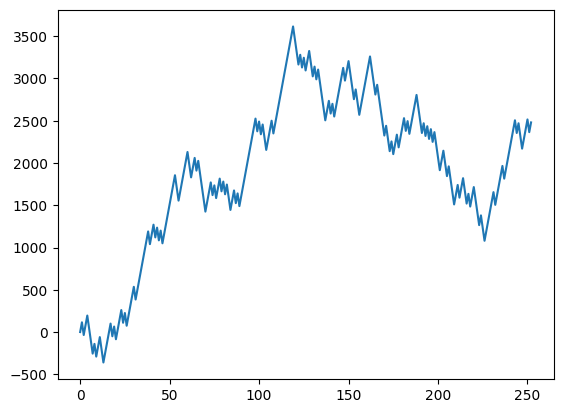

In [61]:
import matplotlib.pyplot as plt

pl = [0]
for i in range(252):
    pl.append(win_exp_slider.value if np.random.binomial(1, win_prob_slider.value) > 0 else loss_exp_slider.value)

plt.plot(np.cumsum(pl))